Используя данные индекса РТС за последние годы

https://video.ittensive.com/python-advanced/rts-index.csv

постройте отдельные графики закрытия (Close) индекса по дням за 2017, 2018, 2019 годы в единой оси X.

Добавьте на график экспоненциальное среднее за 20 дней для значения Max за 2017 год.

Найдите последнюю дату, когда экспоненциальное среднее максимального дневного значения (Max) в 2017 году было больше, чем соответствующее значение Close в 2019 году (это последнее пересечение графика за 2019 год и графика для среднего за 2017 год).
Вопросы к этому заданию

После какого дня 2019 года индекс РТС по закрытию окончательно превысил максимальные показатели за аналогичный день 2017 года? Ответ введите в виде ДД.ММ, например, 09.12

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np

In [143]:
data = pd.read_csv("https://video.ittensive.com/python-advanced/rts-index.csv")
data.dropna(axis=1, how='all', inplace=True)
data["Date"]=pd.to_datetime(data["Date"])
dates = pd.date_range(min(data["Date"]), max(data["Date"]), periods=len(data.index))
print(data.info())
data.set_index("Date", inplace=True)
data.reindex(dates).fillna(method="ffill")
data.sort_index()
data["Day"]=pd.to_datetime(data.index).dayofyear

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6058 entries, 0 to 6057
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        6058 non-null   datetime64[ns]
 1   Open                        6058 non-null   float64       
 2   Max                         6058 non-null   float64       
 3   Min                         6058 non-null   float64       
 4   Close                       6058 non-null   float64       
 5   Trading Volume, USD         6056 non-null   float64       
 6   Market Capitalization, USD  5660 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 331.4 KB
None


In [144]:
dates

DatetimeIndex([          '1995-01-11 00:00:00',
               '1995-01-12 12:03:26.835066864',
               '1995-01-14 00:06:53.670133729',
               '1995-01-15 12:10:20.505200594',
               '1995-01-17 00:13:47.340267459',
               '1995-01-18 12:17:14.175334323',
               '1995-01-20 00:20:41.010401188',
               '1995-01-21 12:24:07.845468053',
               '1995-01-23 00:27:34.680534918',
               '1995-01-24 12:31:01.515601783',
               ...
               '2019-11-27 11:28:58.484398208',
               '2019-11-28 23:32:25.319465088',
               '2019-11-30 11:35:52.154531968',
               '2019-12-01 23:39:18.989598848',
               '2019-12-03 11:42:45.824665600',
               '2019-12-04 23:46:12.659732480',
               '2019-12-06 11:49:39.494799360',
               '2019-12-07 23:53:06.329866240',
               '2019-12-09 11:56:33.164933120',
                         '2019-12-11 00:00:00'],
              dtype=

In [145]:
data['2019']

,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD",Day
Date,,,,,,,
2019-11-18,1456.17,1461.20,1436.74,1443.02,9.016255e+08,1.799203e+11,322
2019-11-15,1440.29,1450.84,1435.54,1449.42,8.869229e+08,1.807188e+11,319
2019-11-14,1438.67,1448.54,1425.44,1436.98,1.149759e+09,1.791677e+11,318
2019-11-13,1443.19,1443.19,1430.91,1437.85,8.875070e+08,1.792759e+11,317
2019-12-11,1461.37,1471.19,1447.83,1449.35,9.772689e+08,1.807094e+11,345
...,...,...,...,...,...,...,...
2019-10-01,1139.22,1142.32,1129.15,1142.32,5.132281e+08,1.501805e+11,274
2019-09-01,1127.09,1137.15,1124.42,1135.51,5.440616e+08,1.492849e+11,244
2019-08-01,1116.61,1127.70,1114.38,1122.90,4.018374e+08,1.476271e+11,213


In [146]:
data_2019 = data['2019'].reset_index().set_index("Day").sort_index()
data_2017 = data['2017'].reset_index().set_index("Day").sort_index()
data_2018 = data['2018'].reset_index().set_index("Day").sort_index()
data_2019

,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD"
Day,,,,,,,
2,2019-01-02,1213.70,1218.41,1205.11,1211.23,534648987.0,1.592400e+11
3,2019-01-03,1188.80,1194.47,1184.46,1187.35,443393122.0,1.561008e+11
4,2019-01-04,1199.31,1217.68,1199.31,1214.29,536441171.0,1.522199e+11
7,2019-01-07,1383.57,1409.76,1383.57,1401.64,878694126.0,1.650164e+11
8,2019-01-08,1350.46,1352.72,1339.54,1346.40,636984258.0,1.585126e+11
...,...,...,...,...,...,...,...
338,2019-12-04,1243.74,1260.49,1243.60,1253.44,707575781.0,1.571270e+11
341,2019-12-07,1397.71,1398.55,1379.50,1387.87,609448737.0,1.633954e+11
342,2019-12-08,1296.69,1302.04,1287.47,1294.12,434545430.0,1.523578e+11


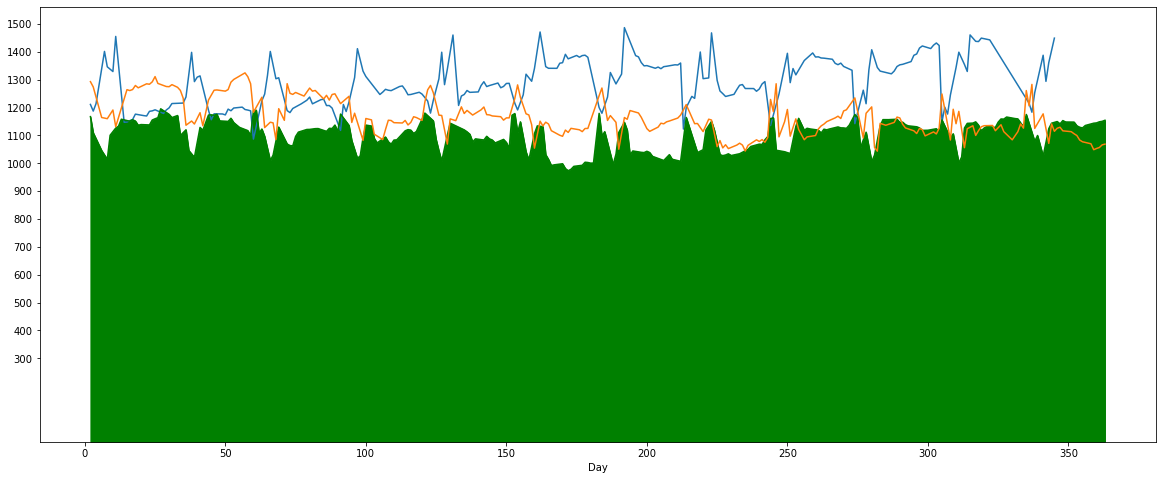

In [147]:
fig = plt.figure(figsize=(20, 8))
axs = fig.add_subplot(1, 1, 1)
data_2019["Close"].plot.line(ax=axs)
data_2017["Close"].plot.area(ax=axs, color='green')
data_2018["Close"].plot.line(ax=axs)
axs.set_yticks(np.arange(300, 1501, 100))
plt.show()

In [153]:
data_2019[data_2019["Close"] > data_2017["Close"]]

ValueError: Can only compare identically-labeled Series objects

In [151]:
data_2017[:]

,Date,Open,Max,Min,Close,"Trading Volume, USD","Market Capitalization, USD"
Day,,,,,,,
2,2017-01-02,1162.08,1167.53,1156.86,1167.53,480726378.0,1.737117e+11
3,2017-01-03,1099.11,1115.19,1096.61,1109.39,601045621.0,1.650613e+11
6,2017-01-06,1058.70,1060.08,1037.97,1045.63,750653535.0,1.587451e+11
8,2017-01-08,1014.43,1022.92,1012.51,1014.24,514477509.0,1.492178e+11
9,2017-01-09,1098.08,1103.54,1094.62,1100.58,534685382.0,1.619194e+11
...,...,...,...,...,...,...,...
359,2017-12-25,1138.43,1145.62,1138.30,1143.94,185988550.0,1.601012e+11
360,2017-12-26,1144.24,1147.27,1137.88,1144.97,207031662.0,1.602453e+11
361,2017-12-27,1147.57,1152.09,1145.46,1148.92,459948828.0,1.607991e+11


In [ ]:
data_2019